In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [66]:
df=pd.read_csv('bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
df.shape

(45211, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()

In [48]:
df.job=le.fit_transform(df['job'])
df.marital=le.fit_transform(df['marital'])
df.education=le.fit_transform(df['education'])
df.default=le.fit_transform(df['default'])
df.month=le.fit_transform(df['month'])
df.poutcome=le.fit_transform(df['poutcome'])
df.y=le.fit_transform(df['y'])
df.housing=le.fit_transform(df['housing'])
df.loan=le.fit_transform(df['loan'])
df.contact=le.fit_transform(df['contact'])
df['Age_group']=le.fit_transform(df['Age_group'])


In [15]:
df1=df
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_group
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,3
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0,3
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0,3
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0,3
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0,3


In [16]:
x=df1.drop('y',1)
y=df1.y

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf=RandomForestClassifier()

In [21]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
y_pred=rf.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
accuracy_score(y_test,y_pred)

0.8998083161309348

In [25]:
confusion_matrix(y_test,y_pred)

array([[11638,   329],
       [ 1030,   567]])

In [26]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94     11967
          1       0.63      0.36      0.45      1597

avg / total       0.89      0.90      0.89     13564



In [27]:
data=pd.DataFrame(rf.feature_importances_*100.0,columns=['GiniValue Percentage'])
data.index=x.columns

In [28]:
data

,GiniValue Percentage
age,9.809994
job,5.054669
marital,2.261238
education,2.880298
default,0.159168
balance,10.964675
housing,2.268893
loan,0.934523
contact,2.096613
day,8.872642


In [29]:
final=data.sort_values(['GiniValue Percentage'],ascending=False)
final

,GiniValue Percentage
duration,28.757270
balance,10.964675
age,9.809994
day,8.872642
month,8.576673
pdays,5.121822
job,5.054669
poutcome,4.713607
campaign,3.929246
education,2.880298


In [30]:
final.head(14)

,GiniValue Percentage
duration,28.757270
balance,10.964675
age,9.809994
day,8.872642
month,8.576673
pdays,5.121822
job,5.054669
poutcome,4.713607
campaign,3.929246
education,2.880298


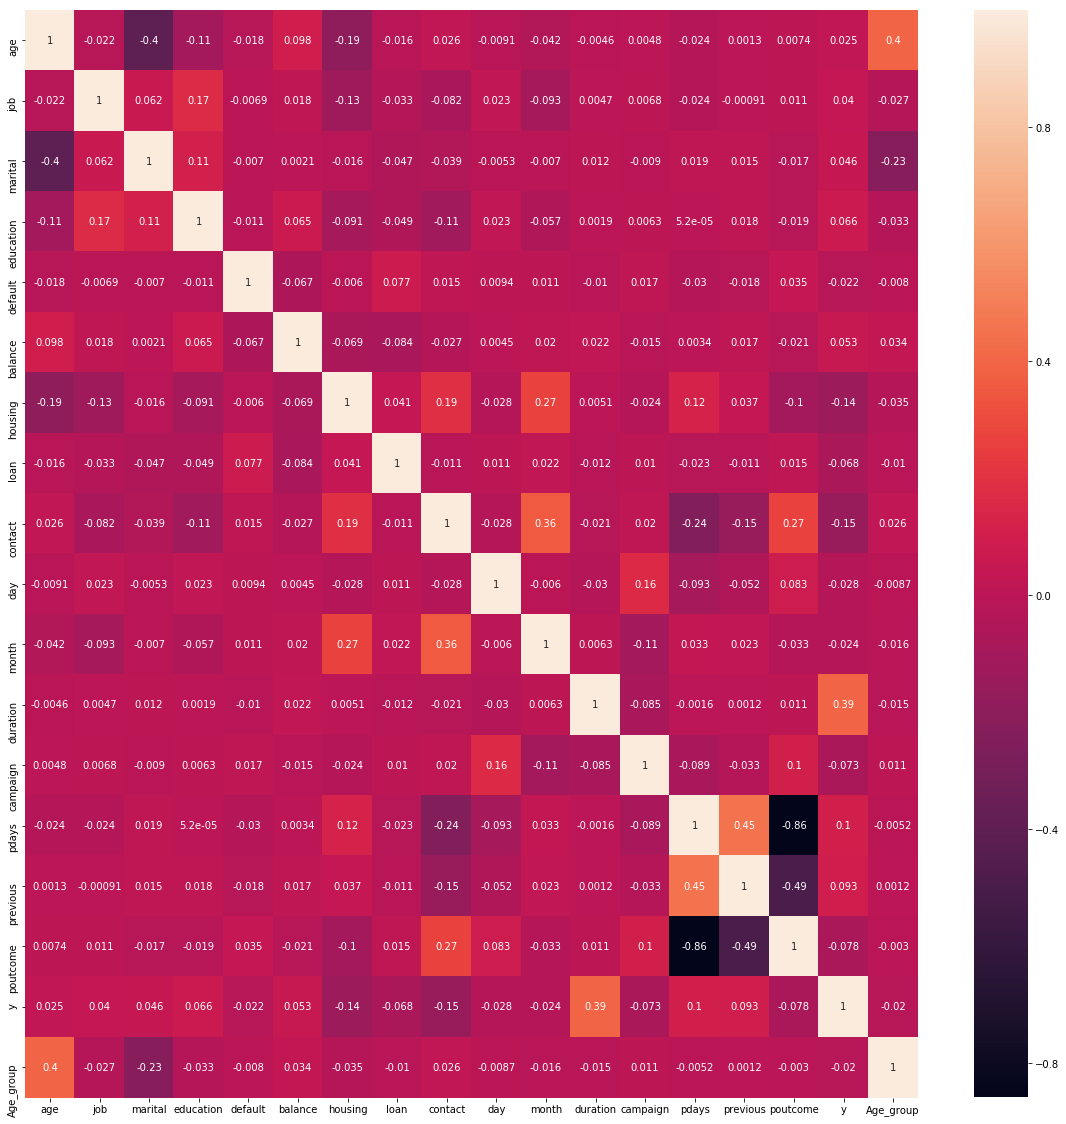

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

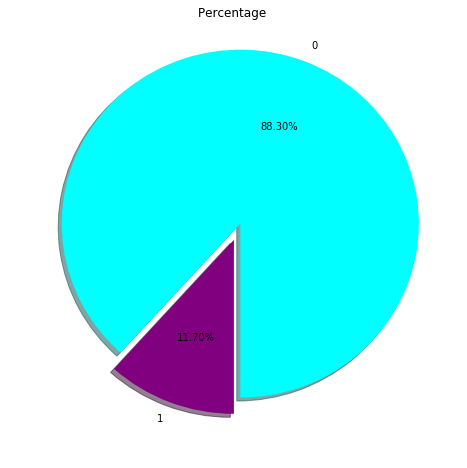

In [32]:
sizes = df['y'].value_counts(sort = True)
labels = df['y'].value_counts(sort = True).index
colors = ["cyan","purple"] 
rcParams['figure.figsize'] = 8,8
explode=(0.1,0)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=270,)
plt.title('Percentage ')
plt.show()

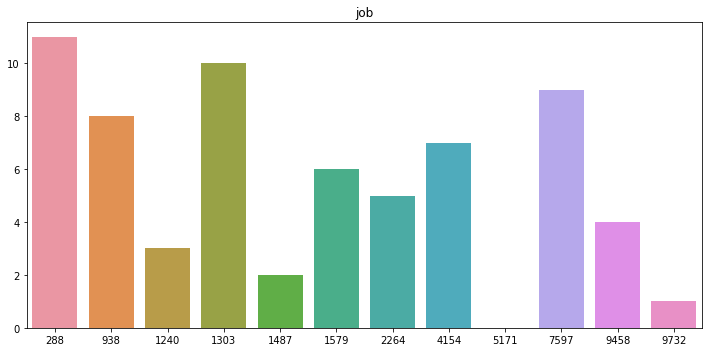

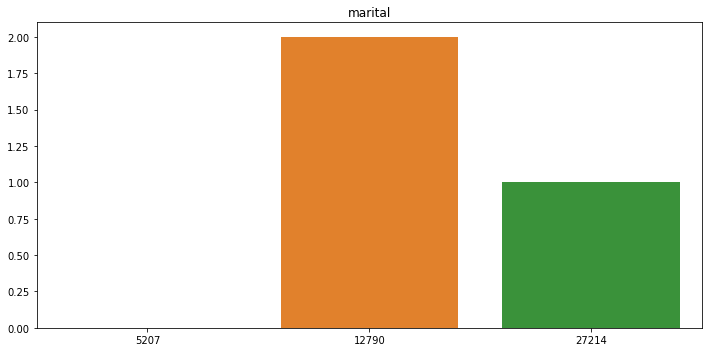

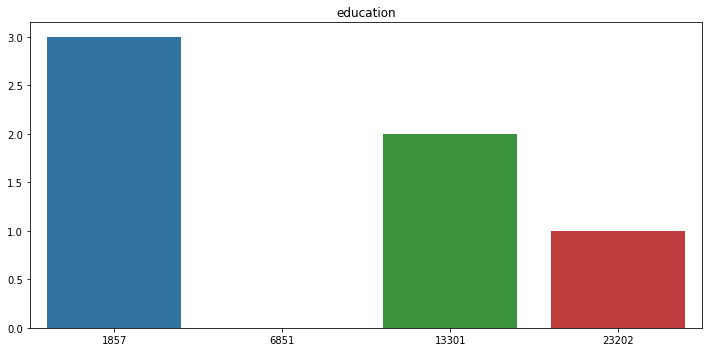

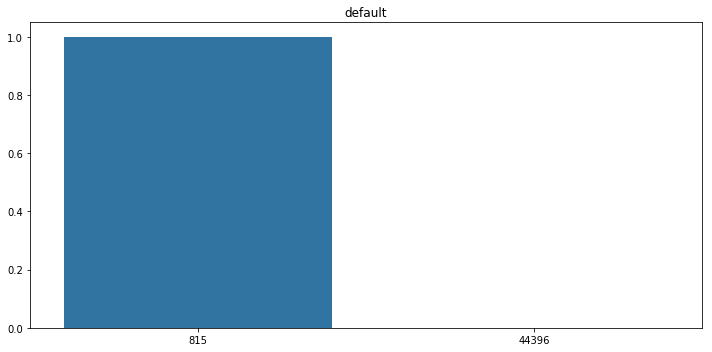

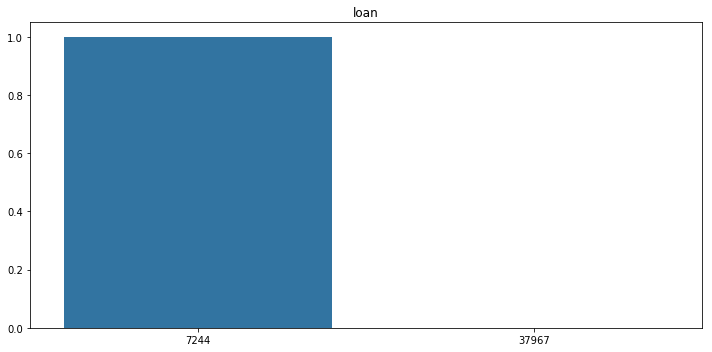

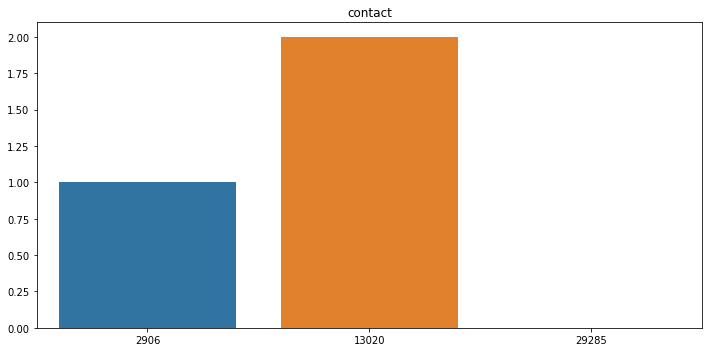

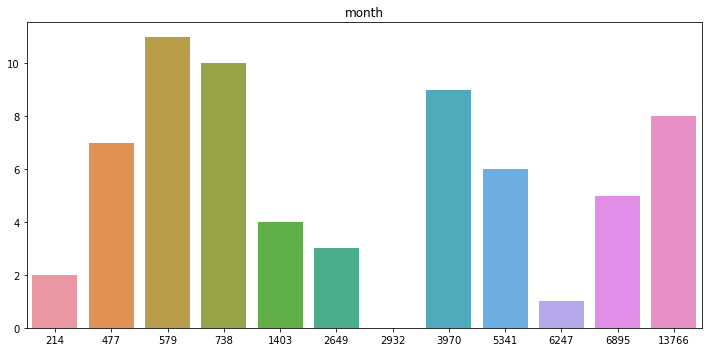

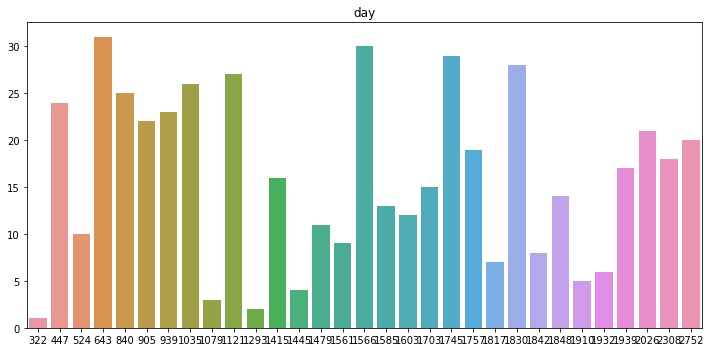

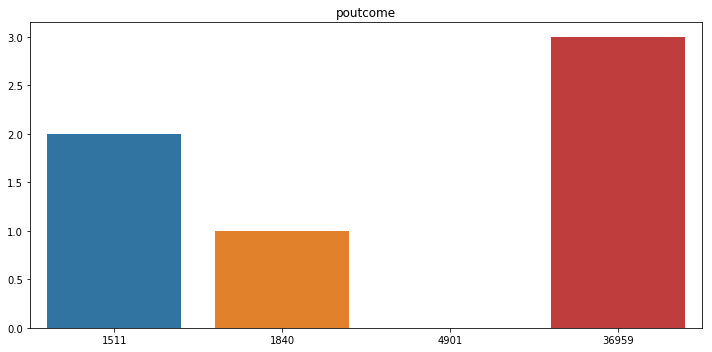

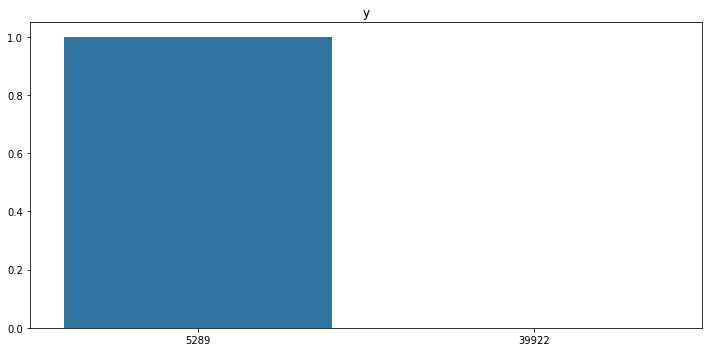

In [33]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,5))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

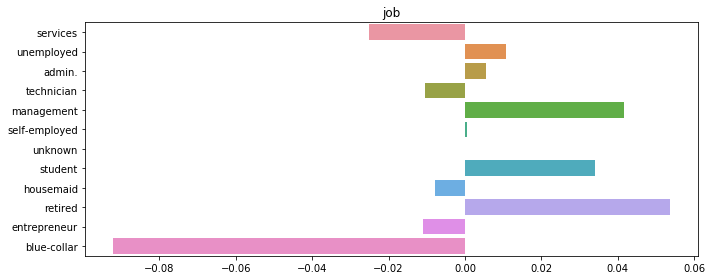

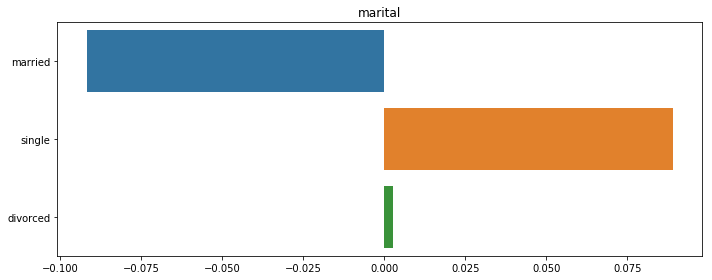

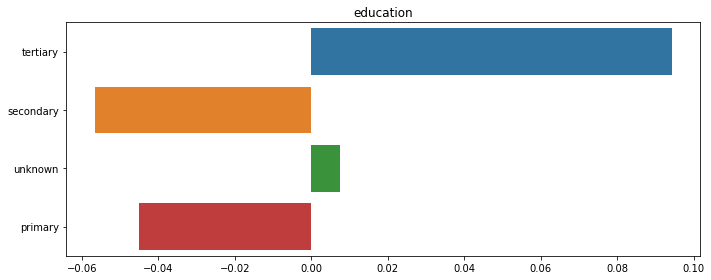

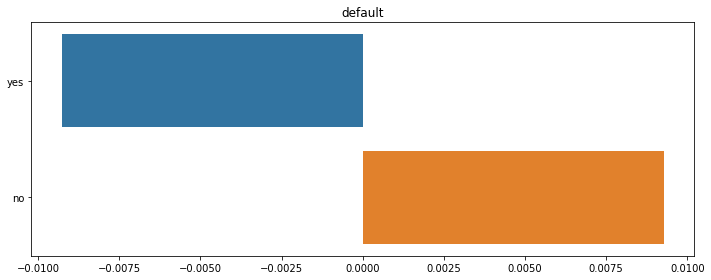

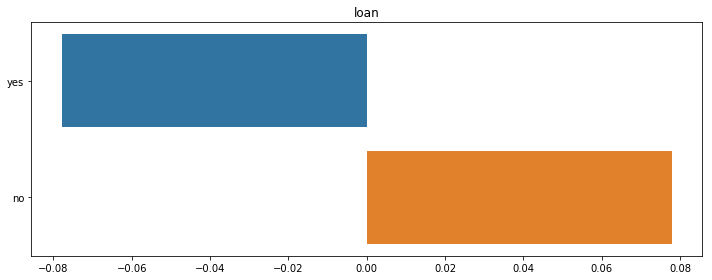

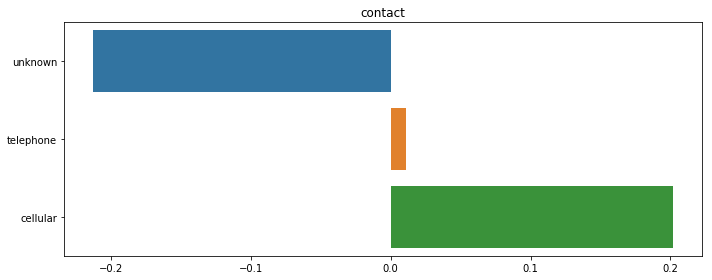

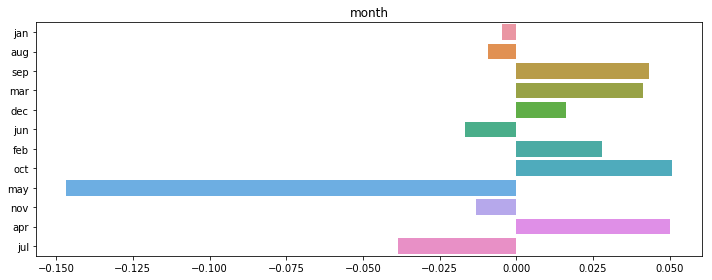

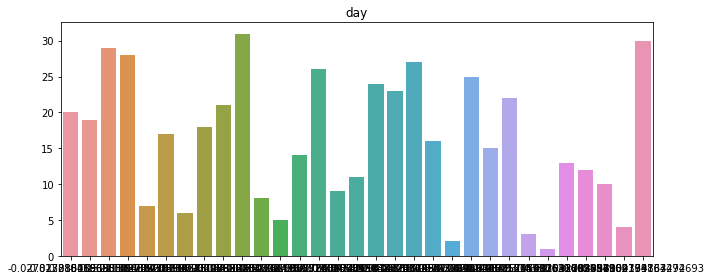

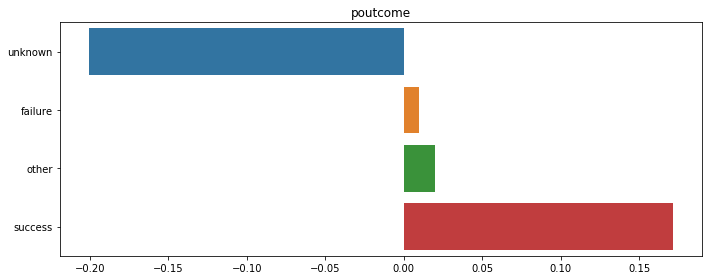

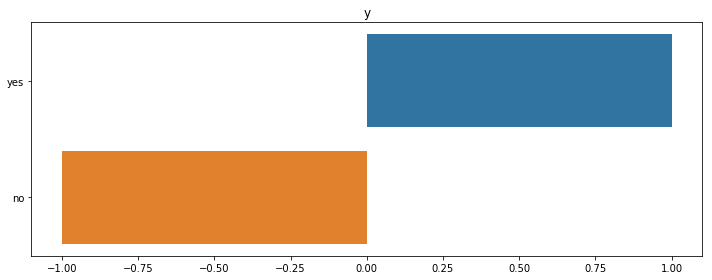

In [36]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

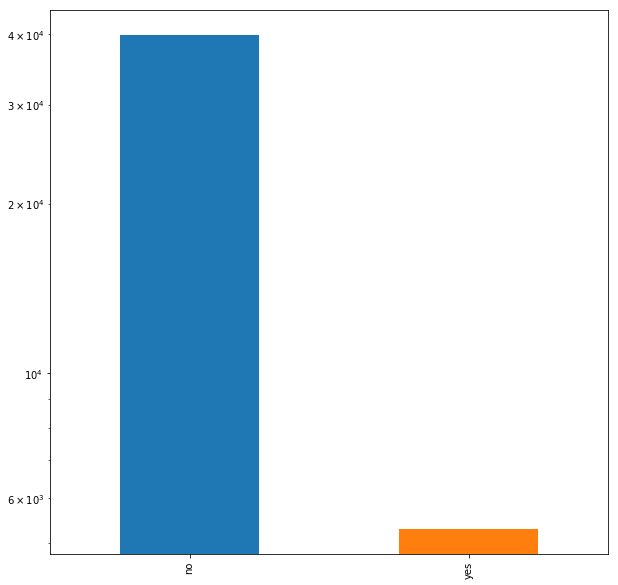

In [37]:
plt.figure(figsize=(10,10))
plt.yscale('log')
df['y'].value_counts().plot(kind='bar')

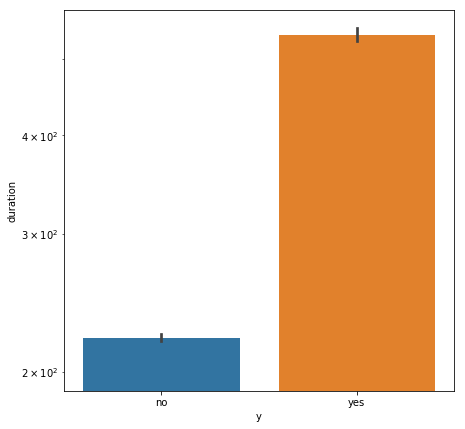

In [38]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','duration',data=df, estimator=np.mean)

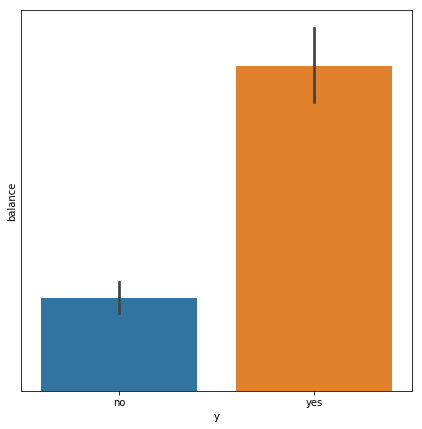

In [39]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','balance',data=df, estimator=np.mean)

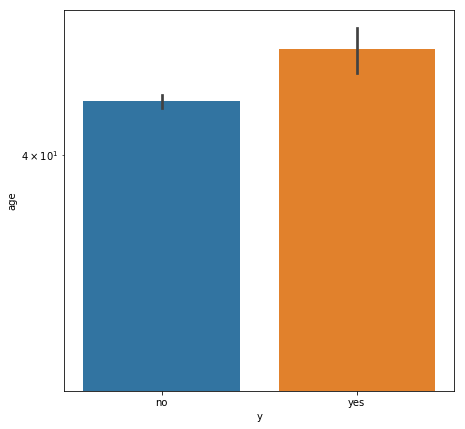

In [40]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','age',data=df, estimator=np.mean)

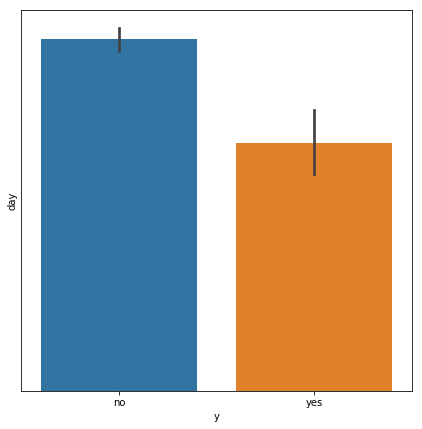

In [41]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','day',data=df, estimator=np.mean)

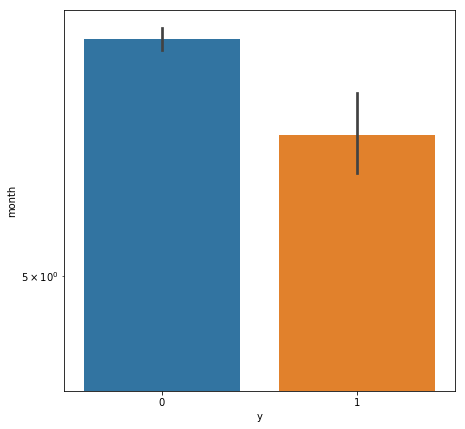

In [49]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','month',data=df, estimator=np.mean)

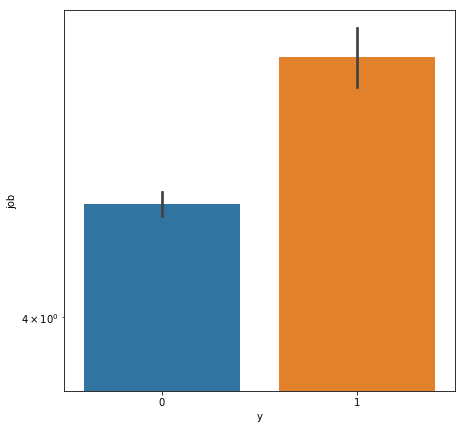

In [50]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','job',data=df, estimator=np.mean)

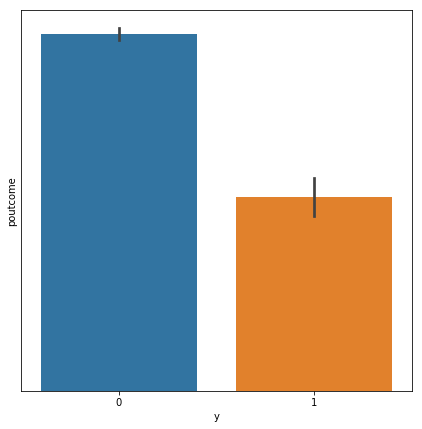

In [51]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','poutcome',data=df, estimator=np.mean)

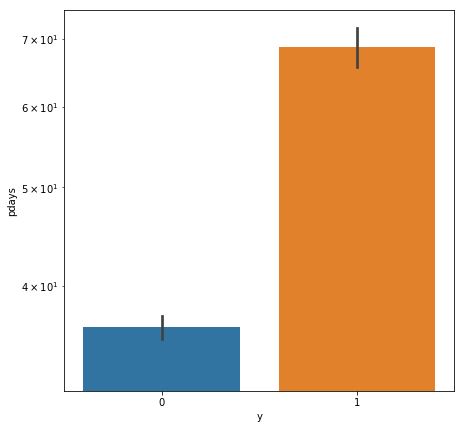

In [52]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','pdays',data=df, estimator=np.mean)

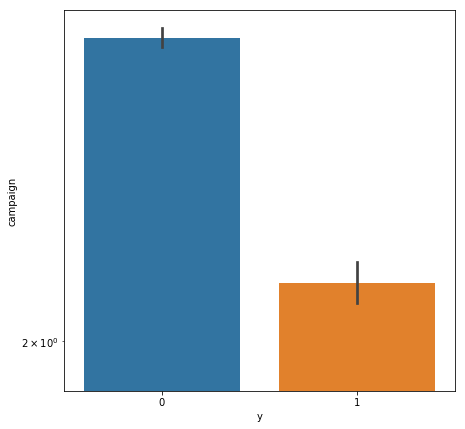

In [53]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','campaign',data=df, estimator=np.mean)

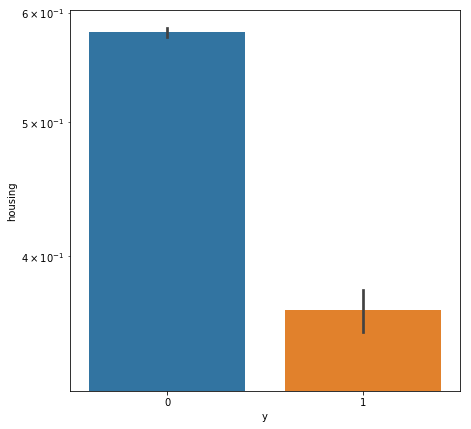

In [54]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','housing',data=df, estimator=np.mean)

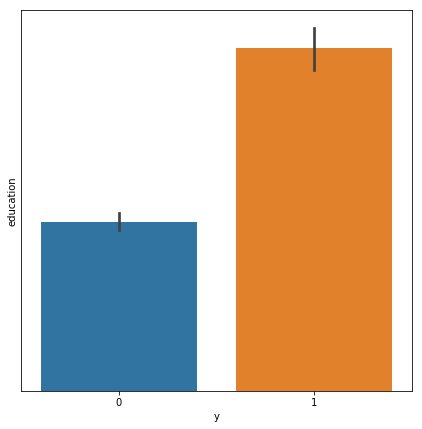

In [55]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','education',data=df, estimator=np.mean)

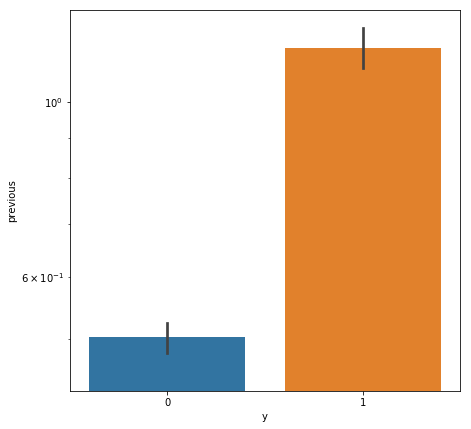

In [56]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','previous',data=df, estimator=np.mean)

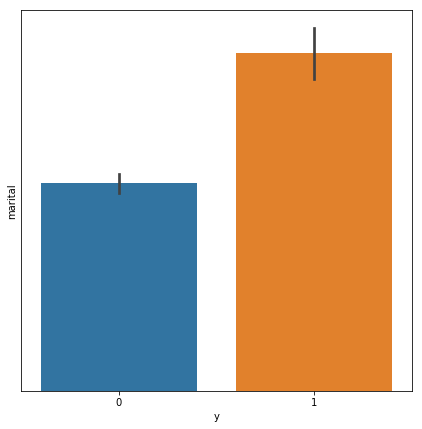

In [57]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','marital',data=df, estimator=np.mean)

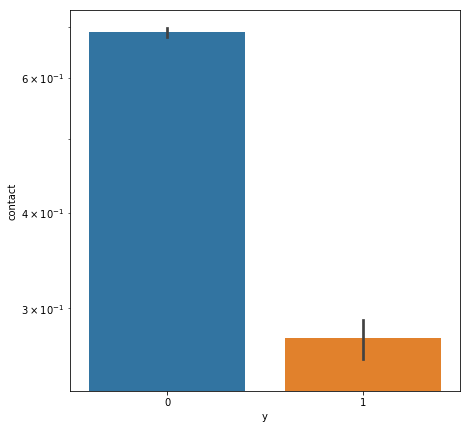

In [58]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','contact',data=df, estimator=np.mean)

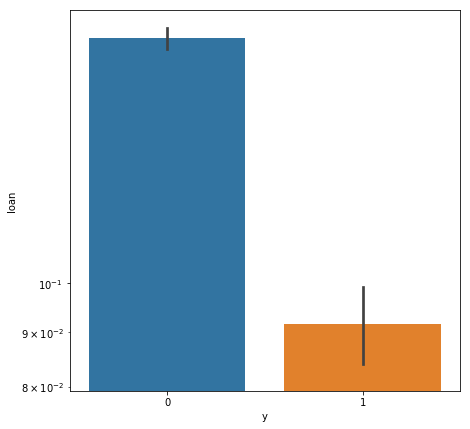

In [59]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','loan',data=df, estimator=np.mean)

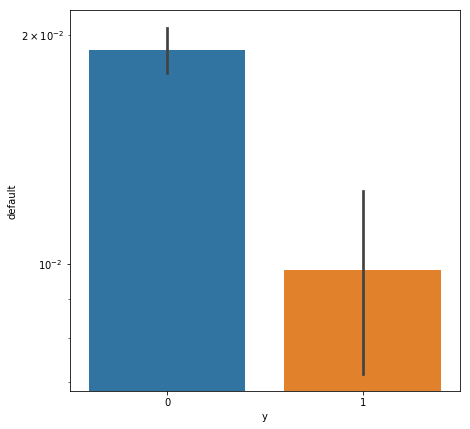

In [60]:
plt.figure(figsize=(7,7))
plt.yscale('log')
sns.barplot('y','default',data=df, estimator=np.mean)

In [67]:
cross_tab(df,'job','education')

NameError: name 'cross_tab' is not defined

In [63]:
df.groupby(['education'])['y'].count()

education
0     6851
1    23202
2    13301
3     1857
Name: y, dtype: int64

In [68]:
df2=df[df['education']=='basic.4y']
df3=round(df2[df2['y']=='yes'].count()*100/len(df2),2)
df3

age         NaN
job         NaN
marital     NaN
education   NaN
default     NaN
balance     NaN
housing     NaN
loan        NaN
contact     NaN
day         NaN
month       NaN
duration    NaN
campaign    NaN
pdays       NaN
previous    NaN
poutcome    NaN
y           NaN
dtype: float64

In [69]:
df2=df[df['education']=='high.school']
df3=round(df2[df2['y']=='yes'].count()*100/len(df2),2)
df3

age         NaN
job         NaN
marital     NaN
education   NaN
default     NaN
balance     NaN
housing     NaN
loan        NaN
contact     NaN
day         NaN
month       NaN
duration    NaN
campaign    NaN
pdays       NaN
previous    NaN
poutcome    NaN
y           NaN
dtype: float64

In [70]:
df2=df[df['education']=='primary']
df3=round(df2[df2['y']=='yes'].count()*100/len(df2),2)
df3

age          8.63
job          8.63
marital      8.63
education    8.63
default      8.63
balance      8.63
housing      8.63
loan         8.63
contact      8.63
day          8.63
month        8.63
duration     8.63
campaign     8.63
pdays        8.63
previous     8.63
poutcome     8.63
y            8.63
dtype: float64

In [71]:
df2=df[df['education']=='tertiary']
df3=round(df2[df2['y']=='yes'].count()*100/len(df2),2)
df3

age          15.01
job          15.01
marital      15.01
education    15.01
default      15.01
balance      15.01
housing      15.01
loan         15.01
contact      15.01
day          15.01
month        15.01
duration     15.01
campaign     15.01
pdays        15.01
previous     15.01
poutcome     15.01
y            15.01
dtype: float64

In [72]:
df2=df[df['education']=='university.degree']
df3=round(df2[df2['y']=='yes'].count()*100/len(df2),2)
df3

age         NaN
job         NaN
marital     NaN
education   NaN
default     NaN
balance     NaN
housing     NaN
loan        NaN
contact     NaN
day         NaN
month       NaN
duration    NaN
campaign    NaN
pdays       NaN
previous    NaN
poutcome    NaN
y           NaN
dtype: float64

In [73]:
df2=df[df['education']=='unknown']
df3=round(df2[df2['y']=='yes'].count()*100/len(df2),2)
df3

age          13.57
job          13.57
marital      13.57
education    13.57
default      13.57
balance      13.57
housing      13.57
loan         13.57
contact      13.57
day          13.57
month        13.57
duration     13.57
campaign     13.57
pdays        13.57
previous     13.57
poutcome     13.57
y            13.57
dtype: float64

In [74]:
c1=pd.DataFrame(df[df['education']=='basic.4y'])[['y']]
round(c1[c1['y']=='yes'].count()/len(c1)*100,2)

y   NaN
dtype: float64

In [75]:
c1=pd.DataFrame(df[df['education']=='high.school'])[['y']]
round(c1[c1['y']=='yes'].count()/len(c1)*100,2)

y   NaN
dtype: float64

In [76]:
c1=pd.DataFrame(df[df['education']=='primary'])[['y']]
round(c1[c1['y']=='yes'].count()/len(c1)*100,2)

y    8.63
dtype: float64

In [77]:
c1=pd.DataFrame(df[df['education']=='tertiary'])[['y']]
round(c1[c1['y']=='yes'].count()/len(c1)*100,2)

y    15.01
dtype: float64

In [274]:
c1=pd.DataFrame(df[df['education']=='university.degree'])[['y']]
round(c1[c1['y']=='yes'].count()/len(c1)*100,2)

y   NaN
dtype: float64

In [275]:
c1=pd.DataFrame(df[df['education']=='unknown'])[['y']]
round(c1[c1['y']=='yes'].count()/len(c1)*100,2)

y    13.57
dtype: float64

In [276]:
c1=pd.DataFrame(df[df['marital']=='married'])[['y']]
round(c1[c1['y']=='no'].count()/len(c1)*100,2)

y    89.88
dtype: float64

In [277]:
c1=pd.DataFrame(df[df['marital']=='divorced'])[['y']]
round(c1[c1['y']=='no'].count()/len(c1)*100,2)

y    88.05
dtype: float64

In [278]:
c1=pd.DataFrame(df[df['marital']=='single'])[['y']]
round(c1[c1['y']=='no'].count()/len(c1)*100,2)

y    85.05
dtype: float64

In [279]:
c1=pd.DataFrame(df[df['job']=='entrepreneur'])[['y']]
round(c1[c1['y']=='no'].count()/len(c1)*100,2)

y    91.73
dtype: float64

In [280]:
c1=pd.DataFrame(df[df['job']=='technician'])[['y']]
round(c1[c1['y']=='no'].count()/len(c1)*100,2)

y    88.94
dtype: float64

In [281]:
c1=pd.DataFrame(df[df['job']=='unknown'])[['y']]
round(c1[c1['y']=='no'].count()/len(c1)*100,2)

y    88.19
dtype: float64

In [282]:
c1=pd.DataFrame(df[df['job']=='retired'])[['y']]
round(c1[c1['y']=='no'].count()/len(c1)*100,2)

y    77.21
dtype: float64

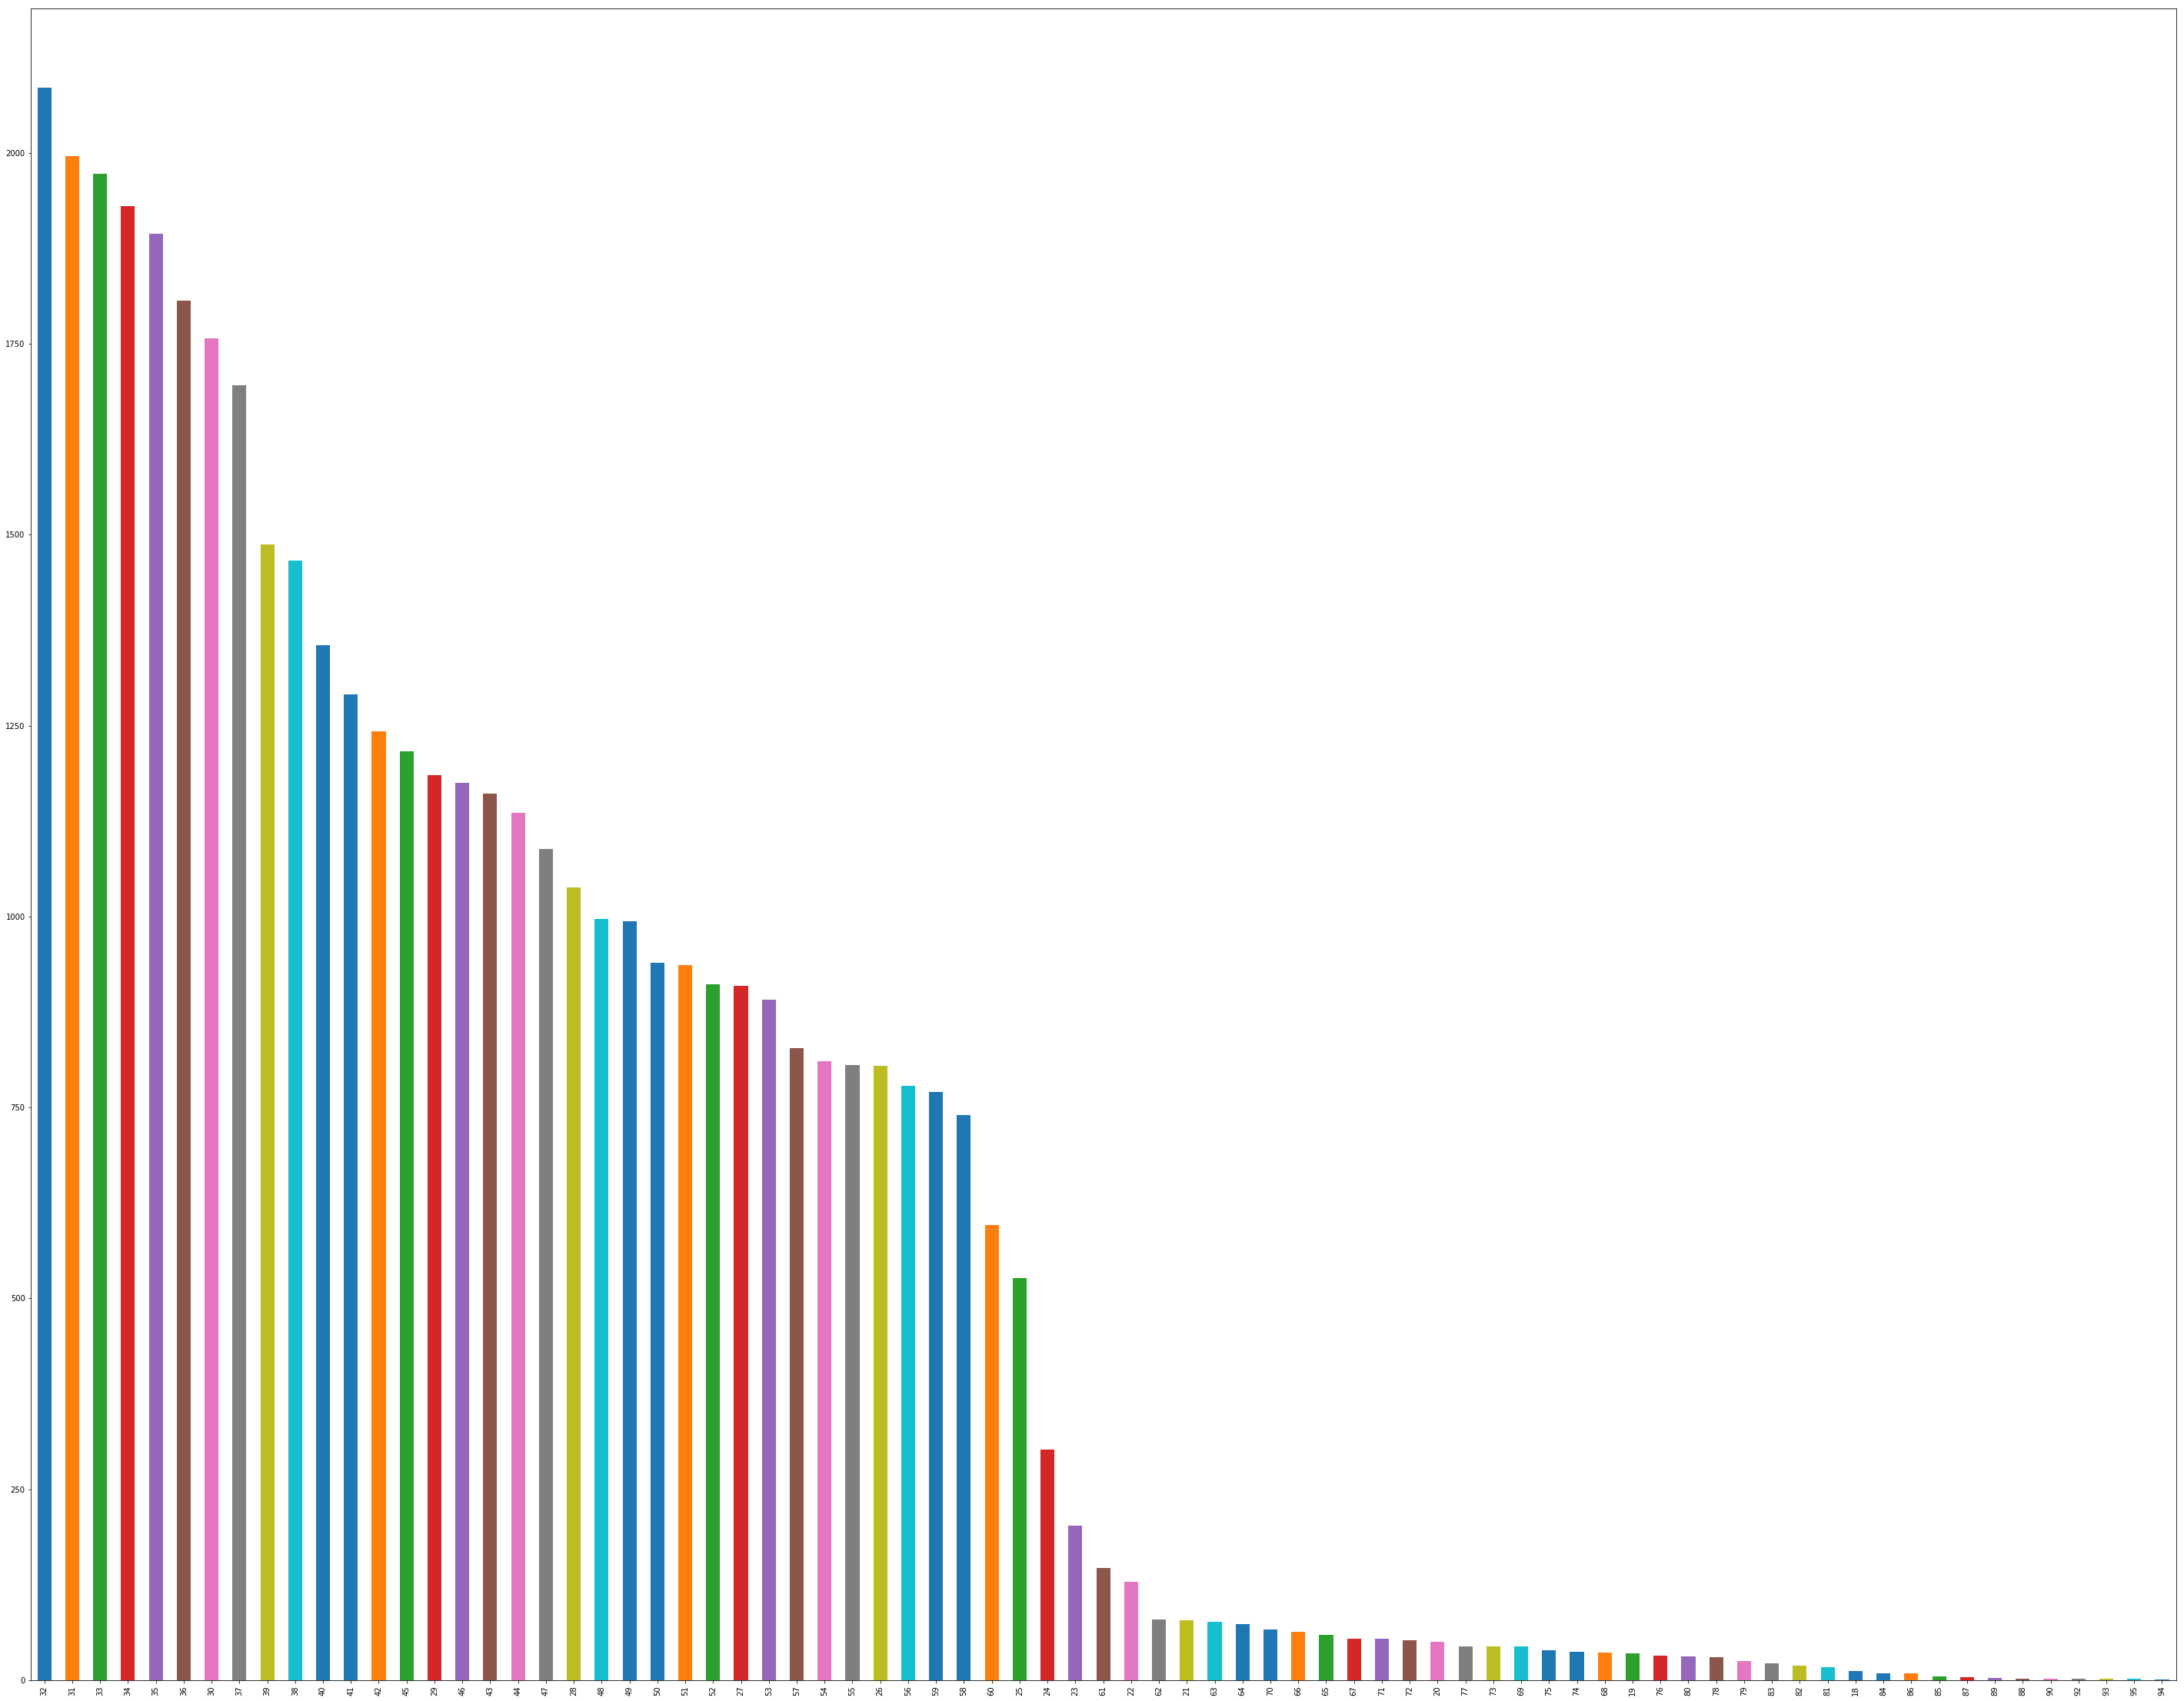

In [172]:
plt.figure(figsize=(50,40))
df['age'].value_counts().plot(kind='bar')

In [78]:
df['Age_group']=df['age'].apply(lambda x:'18-30'if (x<=30 & x>=18)else('31-40' if (x<=40 & x>=31) else( '40-50' if(x<=50 & x>=41) else '50-60' )))
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,50-60
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,50-60
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,50-60
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,50-60
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,50-60
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,18-30
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,50-60
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,50-60
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,50-60


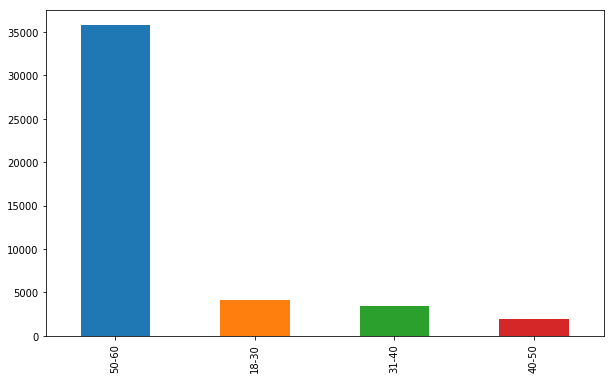

In [174]:
plt.figure(figsize=(10,6))
df['Age_group'].value_counts().plot(kind='bar')

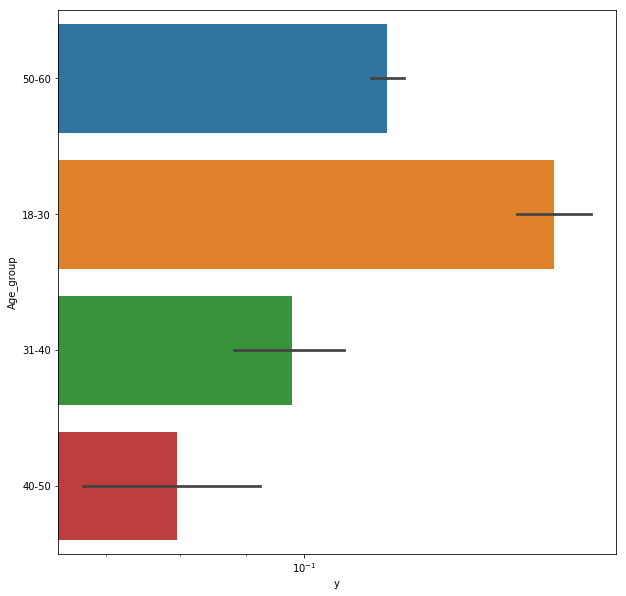

In [175]:
plt.figure(figsize=(10,10))
plt.xscale('log')
sns.barplot('y','Age_group',data=df,estimator=np.mean)

In [176]:
df.groupby(['Age_group'])['y'].count().sum()

45211

In [177]:
df.groupby(['Age_group'])['y'].count()

Age_group
18-30     4093
31-40     3440
40-50     1936
50-60    35742
Name: y, dtype: int64

# UpSampling

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [242]:
print(df1.y.value_counts())

0    39922
1     5289
Name: y, dtype: int64


In [91]:
# separate minority and majority classes
not_plan = df1[df1.y==0]
plan = df1[df1.y==1]

# upsample minority
plan_upsampled = resample(plan,
                          replace=True, # sample with replacement
                          n_samples=len(not_plan), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_plan, plan_upsampled])

# check new class counts
upsampled['y'].value_counts()

1    39922
0    39922
Name: y, dtype: int64

In [92]:
from sklearn.utils import resample

In [93]:
# Separate input features and target
y = upsampled.y
X = upsampled.drop('y', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [94]:
rf=RandomForestClassifier()

In [95]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
y_pred=rf.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred)

0.9693402134161615

In [98]:
confusion_matrix(y_test,y_pred)

array([[9407,  590],
       [  22, 9942]])

In [99]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97      9997
          1       0.94      1.00      0.97      9964

avg / total       0.97      0.97      0.97     19961



# DownSampling

In [100]:
# separate minority and majority classes
not_plan = df1[df1.y==0]
plan = df1[df1.y==1]

# upsample minority
plan_upsampled = resample(not_plan,
                          replace=True, # sample with replacement
                          n_samples=len(plan), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([plan, plan_upsampled])

# check new class counts
upsampled['y'].value_counts()

1    5289
0    5289
Name: y, dtype: int64

In [101]:
# Separate input features and target
y = upsampled.y
X = upsampled.drop('y', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [102]:
rf=RandomForestClassifier()

In [103]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
y_pred=rf.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred)

0.8264650283553875

In [106]:
confusion_matrix(y_test,y_pred)

array([[1105,  206],
       [ 253, 1081]])

In [107]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.84      0.83      1311
          1       0.84      0.81      0.82      1334

avg / total       0.83      0.83      0.83      2645



In [251]:
upsampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_group
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,3
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0,3
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0,3
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0,3
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0,3
